In [1]:
# BigMart Sales Analysis and Prediction

#Dataset**: BigMart Sales Dataset from Kaggle  
#Objective**: To analyze sales patterns and build insights for better business decisions.



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the cleaned data
df = pd.read_csv('bigmart_raw.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Shape and basic info
print("Shape of the dataset:", df.shape)
df.info()
df.describe()


Shape of the dataset: (8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# Handle missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

C:\Users\vrnsj\AppData\Local\Temp\ipykernel_26780\3259419274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
C:\Users\vrnsj\AppData\Local\Temp\ipykernel_26780\3259419274.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [6]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [9]:
# Clean 'Item_Fat_Content'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


In [10]:
# 1. Create 'Item_Category' from Item_Identifier
df['Item_Category'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['Item_Category'] = df['Item_Category'].map({'FD': 'Food', 'DR': 'Drinks', 'NC': 'Non-Consumable'})


In [11]:
# 2. Create 'Outlet_Age'
df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,26
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,27
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,38


In [13]:
# Replace 0 values with mean
df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean())

In [14]:
# Convert to integers if needed
df['Item_Weight'] = df['Item_Weight'].astype(int)
df['Item_MRP'] = df['Item_MRP'].astype(int)
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(int)
df['Item_Visibility'] = df['Item_Visibility'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   int32  
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   int32  
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   int32  
 12  Item_Category              8523 non-null   object 
 13  Outlet_Age                 8523 non-null   int64

In [17]:
# Get only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
print("Numerical Columns:", list(num_cols))


Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age']


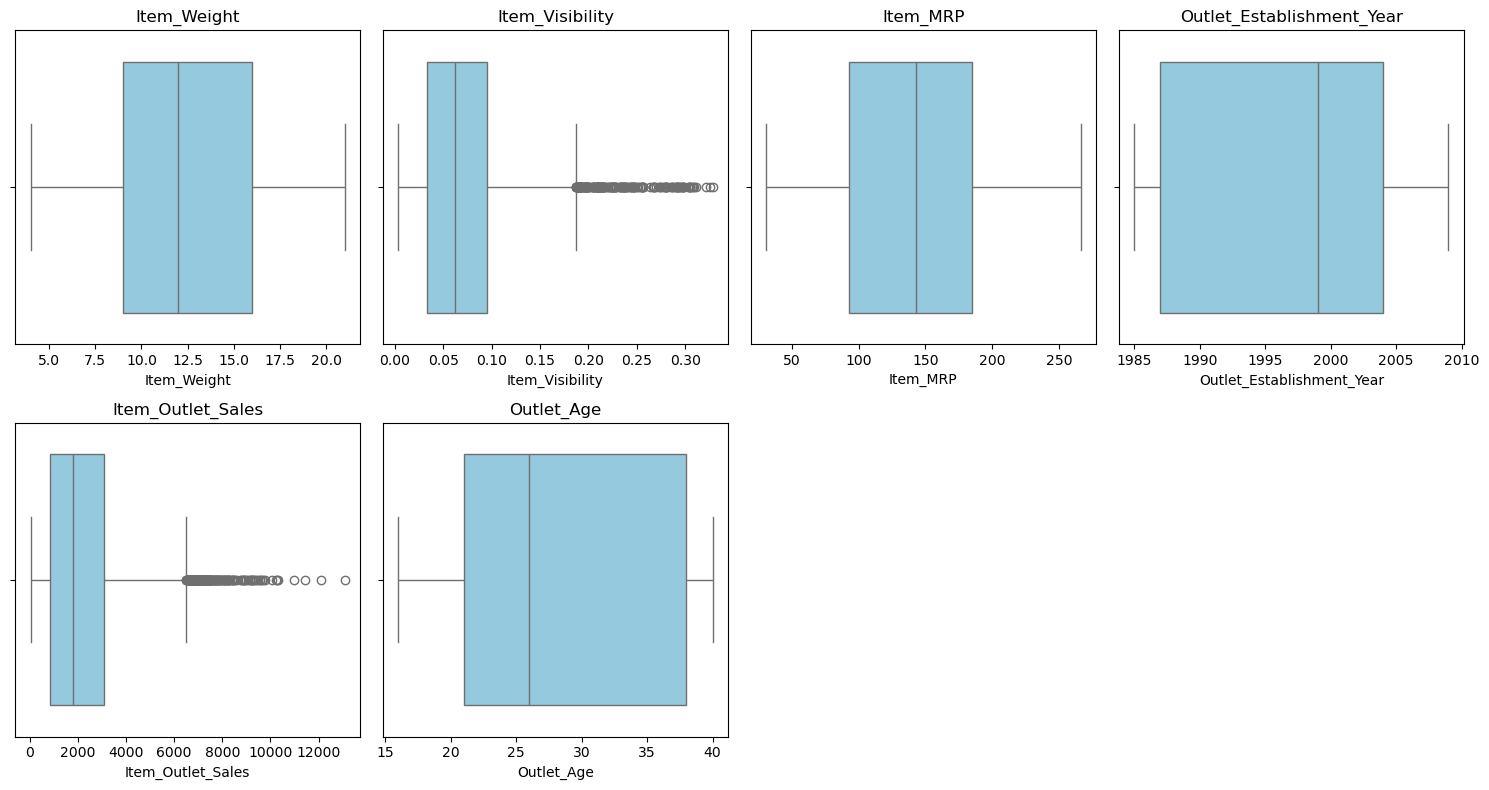

In [18]:
# Plot boxplots to visually check outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


In [19]:
# Function to find outliers using IQR
def find_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers for each numerical column
for col in num_cols:
    outliers = find_outliers_IQR(df, col)
    print(f"{col}: {len(outliers)} outliers")


Item_Weight: 0 outliers
Item_Visibility: 173 outliers
Item_MRP: 0 outliers
Outlet_Establishment_Year: 0 outliers
Item_Outlet_Sales: 186 outliers
Outlet_Age: 0 outliers


In [20]:
outliers_sales = find_outliers_IQR(df, 'Item_Outlet_Sales')
outliers_sales


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
43,FDC02,21,Low Fat,0.069103,Canned,259,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768,Food,16
130,FDY25,12,Low Fat,0.033810,Canned,180,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968,Food,40
132,NCR53,12,Low Fat,0.144338,Health and Hygiene,224,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976,Non-Consumable,40
145,FDP16,18,Low Fat,0.039356,Frozen Foods,246,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370,Food,26
203,FDI24,12,Low Fat,0.078362,Baking Goods,177,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704,Food,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16,Low Fat,0.035967,Fruits and Vegetables,260,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549,Food,26
8329,NCQ06,12,Low Fat,0.041622,Household,253,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630,Non-Consumable,40
8350,NCE18,10,Low Fat,0.021421,Household,248,OUT035,2004,Small,Tier 2,Supermarket Type1,7240,Non-Consumable,21
8447,FDS26,20,Low Fat,0.089975,Dairy,261,OUT017,2007,Medium,Tier 2,Supermarket Type1,7588,Food,18


In [21]:
outliers_sales = find_outliers_IQR(df, 'Item_Visibility')
outliers_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age
49,FDS02,12,Regular,0.255395,Dairy,196,OUT019,1985,Small,Tier 1,Grocery Store,780,Food,40
65,FDC46,17,Low Fat,0.195068,Snack Foods,185,OUT010,1998,Medium,Tier 3,Grocery Store,184,Food,27
83,NCL18,12,Low Fat,0.293418,Household,194,OUT019,1985,Small,Tier 1,Grocery Store,583,Non-Consumable,40
108,DRE60,12,Low Fat,0.278974,Soft Drinks,225,OUT019,1985,Small,Tier 1,Grocery Store,679,Drinks,40
174,FDI32,17,Low Fat,0.291865,Fruits and Vegetables,115,OUT010,1998,Medium,Tier 3,Grocery Store,345,Food,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,12,Regular,0.209163,Fruits and Vegetables,179,OUT019,1985,Small,Tier 1,Grocery Store,543,Food,40
8345,FDY28,12,Regular,0.266397,Frozen Foods,215,OUT019,1985,Small,Tier 1,Grocery Store,641,Food,40
8371,DRA59,8,Regular,0.214125,Soft Drinks,183,OUT010,1998,Medium,Tier 3,Grocery Store,185,Drinks,27
8432,FDI16,14,Regular,0.227261,Frozen Foods,54,OUT010,1998,Medium,Tier 3,Grocery Store,159,Food,27


In [22]:
 #Numeric summary
print(df.describe())

# Categorical summary
print(df.describe(include="object"))


       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.330165         0.070213   140.494662                1997.831867   
std       4.253895         0.048742    62.275275                   8.371760   
min       4.000000         0.003575    31.000000                1985.000000   
25%       9.000000         0.033085    93.000000                1987.000000   
50%      12.000000         0.062517   143.000000                1999.000000   
75%      16.000000         0.094585   185.000000                2004.000000   
max      21.000000         0.328391   266.000000                2009.000000   

       Item_Outlet_Sales   Outlet_Age  
count        8523.000000  8523.000000  
mean         2180.786577    27.168133  
std          1706.497259     8.371760  
min            33.000000    16.000000  
25%           833.500000    21.000000  
50%          1794.000000    26.000000  
75%     

In [23]:
df.to_csv("BigMartCleaned.csv", index=False)


In [24]:
 # BigMart Sales - Exploratory Data Analysis (EDA)

In [25]:
df = pd.read_csv("BigMartCleaned.csv")

In [26]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

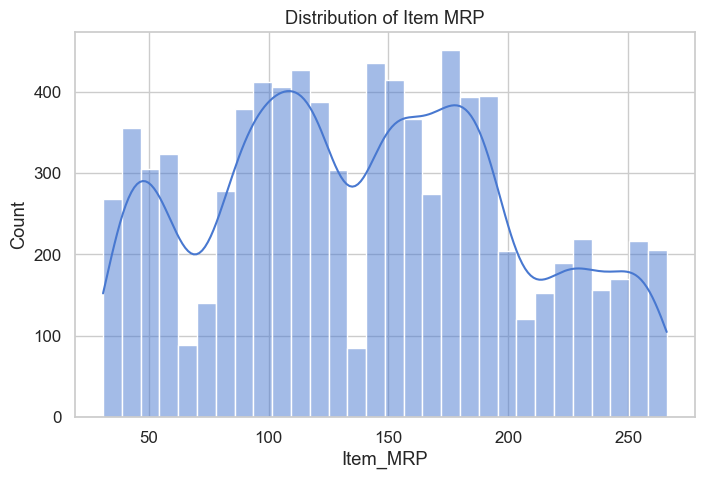

In [27]:
#UNIVARIATE ANALYSIS
# Histogram - Item MRP
plt.figure(figsize=(8,5))
sns.histplot(df['Item_MRP'], bins=30, kde=True)
plt.title("Distribution of Item MRP")
plt.show()

In [28]:
#The Item_MRP distribution shows four distinct price bands rather than a smooth spread.
#The most common price band lies in the mid-range (around ₹120–₹160), indicating mid-priced products dominate the inventory

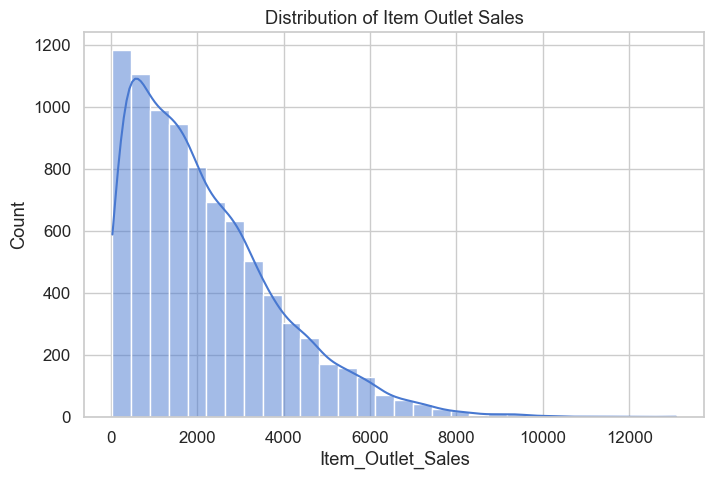

In [29]:
# Histogram - Item Outlet Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Item Outlet Sales")
plt.show()

In [30]:
#Sales are right-skewed, most items sell below ~4000, with few high-selling items driving revenue.

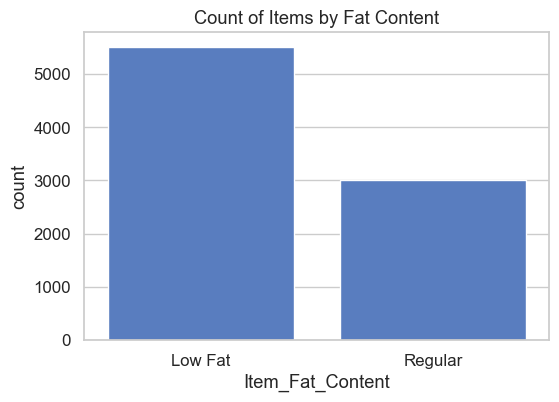

In [31]:
# Countplot - Fat Content
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content', data=df)
plt.title("Count of Items by Fat Content")
plt.show()

In [32]:
# Low Fat products are slightly more common than Regular products.
#Low Fat – the majority of products fall into this category.
#Regular – a smaller but still significant share.
#The higher number of low-fat products might indicate a health-conscious product, possibly targeting customers with dietary preferences.


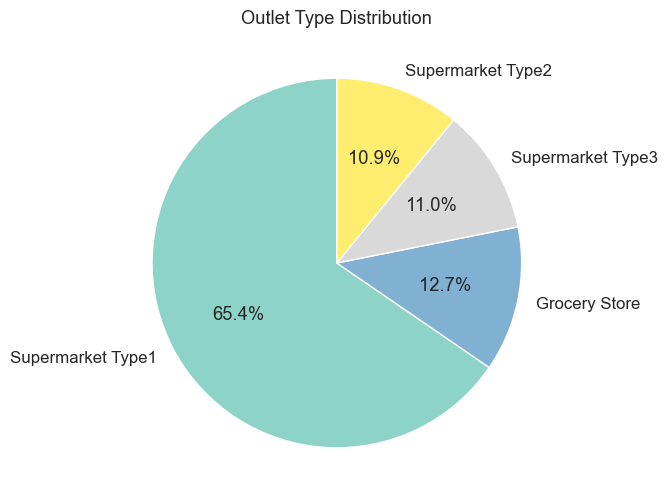

In [33]:
# Pie Chart - Outlet Type
plt.figure(figsize=(6,6))
df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Outlet Type Distribution")
plt.ylabel("")
plt.show()

In [34]:
#Most outlets are Supermarket Type1, indicating a heavy reliance on smaller-format supermarkets.

C:\Users\vrnsj\AppData\Local\Temp\ipykernel_26780\2540162575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlet_sales.index, y=outlet_sales.values, palette="viridis")


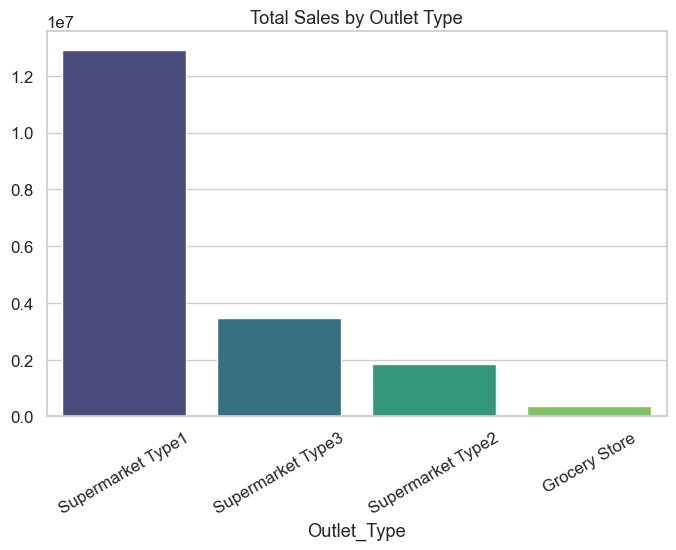

In [35]:
#BIVARIATE ANALYSIS

# Bar chart - Outlet Type vs Total Sales
plt.figure(figsize=(8,5))
outlet_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=outlet_sales.index, y=outlet_sales.values, palette="viridis")
plt.title("Total Sales by Outlet Type")
plt.xticks(rotation=30)
plt.show()

In [36]:
#Supermarket Type 1 dominates total sales, indicating that this format is the most commercially successful, possibly due to wider product variety or better customer reach. 
#Supermarket Type 3 also performs strongly, suggesting it attracts a sizable customer base despite fewer numbers. 
#In contrast, Grocery Stores contribute the least, pointing toward limited product ranges or lower ticket sizes.


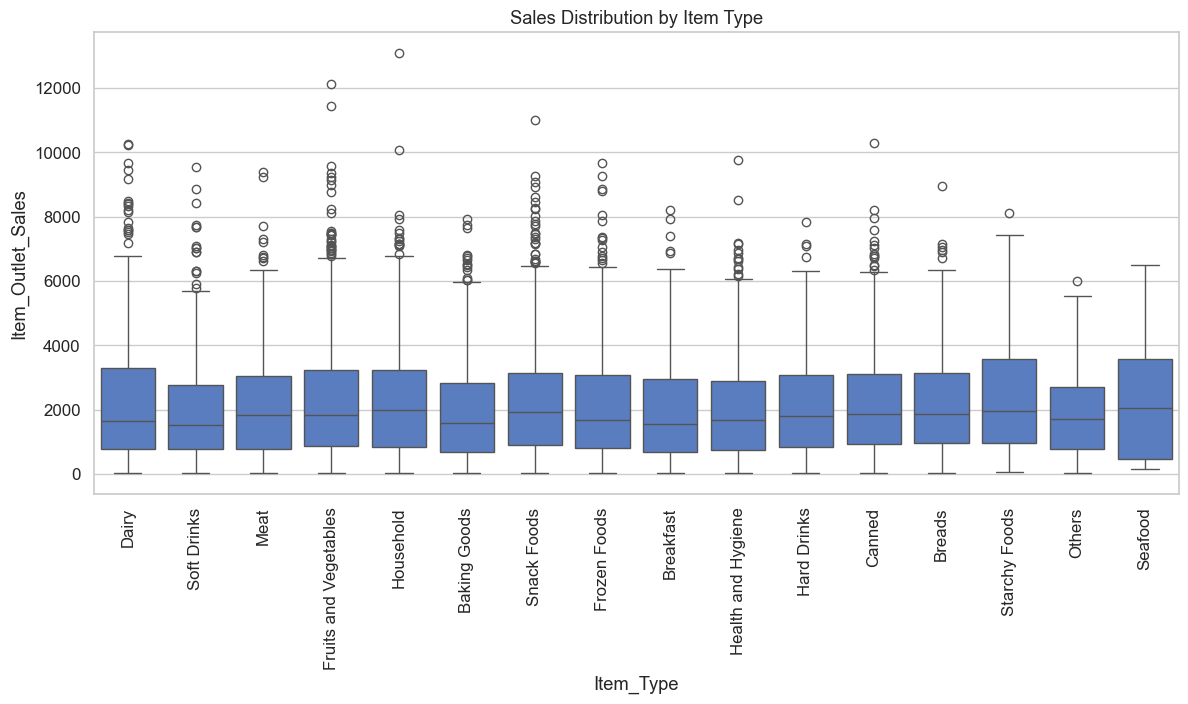

In [37]:
# Boxplot - Item Type vs Sales
plt.figure(figsize=(14,6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title("Sales Distribution by Item Type")
plt.xticks(rotation=90)
plt.show()

In [38]:
#Categories like Fruits & Vegetables, Snack Foods, and Household have higher median sales; Seafood shows lowest sales.

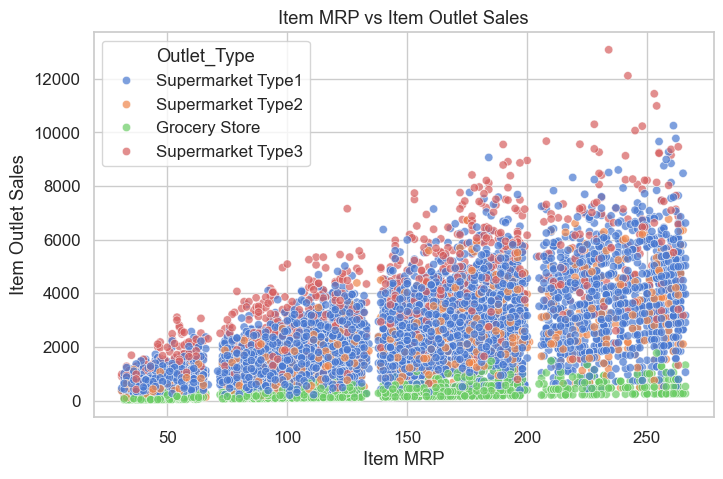

In [39]:
#SCATTER PLOT: Item_MRP vs Item_Outlet_Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Outlet_Type", data=df, alpha=0.7)
plt.title("Item MRP vs Item Outlet Sales")
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.show()

In [40]:
# Higher MRP items tend to have higher sales, with noticeable price clusters.
#Sales generally increase with higher MRP, especially in premium price clusters. 
#However, some low-MRP items also achieve high sales, likely due to high volume demand

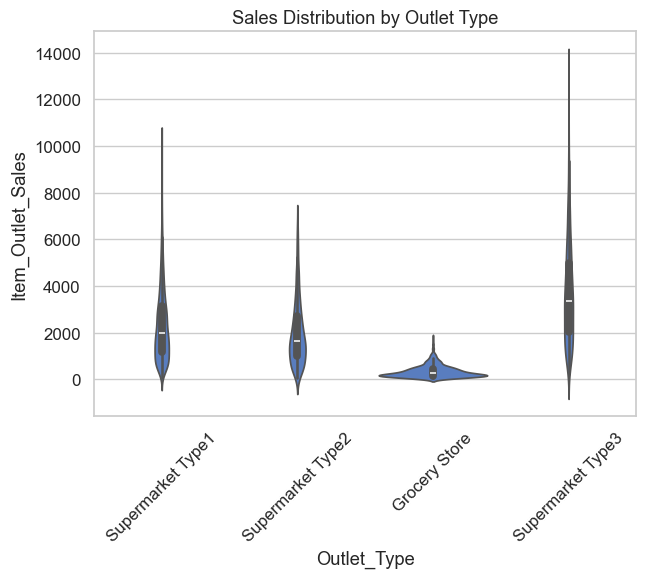

In [41]:
#violin plot
plt.figure(figsize=(7,5))
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title("Sales Distribution by Outlet Type")
plt.xticks(rotation=45)
plt.show()

In [42]:
#Supermarket Type 3 usually shows the highest sales values with a dense concentration at the top end.
#Grocery Stores often have lower and more concentrated sales, with less variation.
#Supermarket Type 1 & 2 lie in between, showing moderate median sales but still with variability.

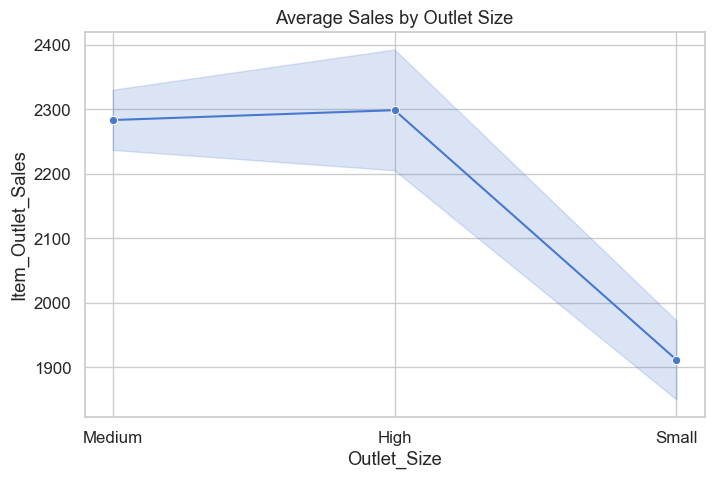

In [43]:
#line chart
plt.figure(figsize=(8,5))
sns.lineplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, estimator='mean', marker="o")
plt.title("Average Sales by Outlet Size")
plt.show()


In [44]:
#Larger outlets tend to generate higher sales compared to small outlets, highlighting the role of store capacity.

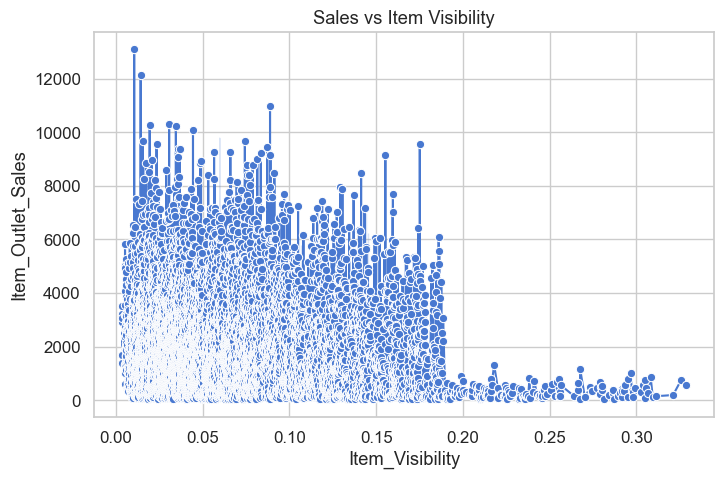

In [45]:
# Sort by visibility for a smoother curve
plt.figure(figsize=(8,5))
sns.lineplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, marker="o")
plt.title("Sales vs Item Visibility")
plt.show()


In [46]:
#At very low visibility, sales are often higher,
#extreme visibility sometimes correlates with reduced sales (possibly discounted/clearance items).

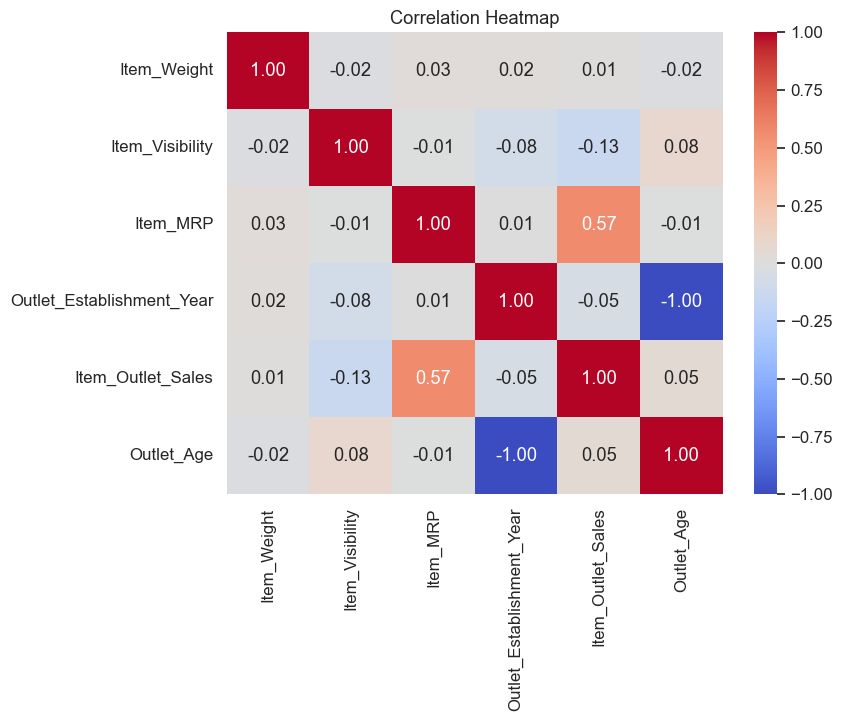

In [47]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
#multivariate
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [48]:
#Item MRP shows a moderate positive correlation with sales.
#Higher-priced items (Item_MRP) are more likely to have higher sales, while other factors like weight and visibility show minimal impact.

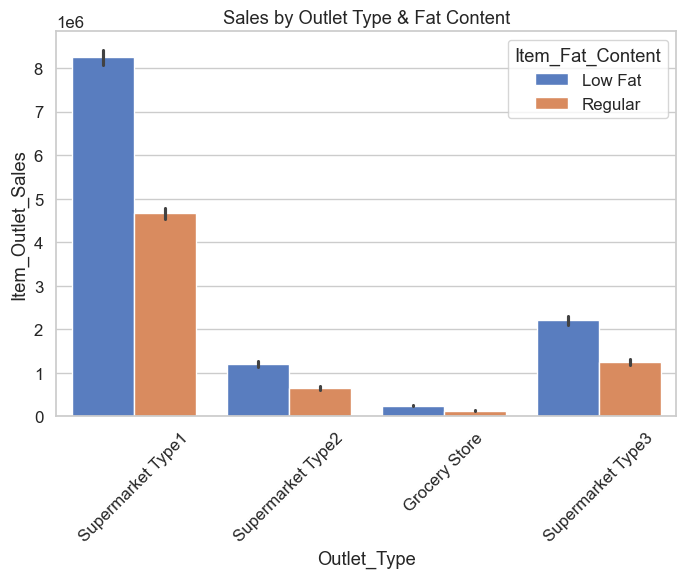

In [49]:
#  Sales by Outlet Type & Fat Content (Grouped Bar)
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df, estimator=sum)
plt.title("Sales by Outlet Type & Fat Content")
plt.xticks(rotation=45)
plt.show()

In [50]:
#Supermarket Type 3 dominates sales for both Low Fat and Regular items.
#In Grocery Stores, sales remain low regardless of fat content.

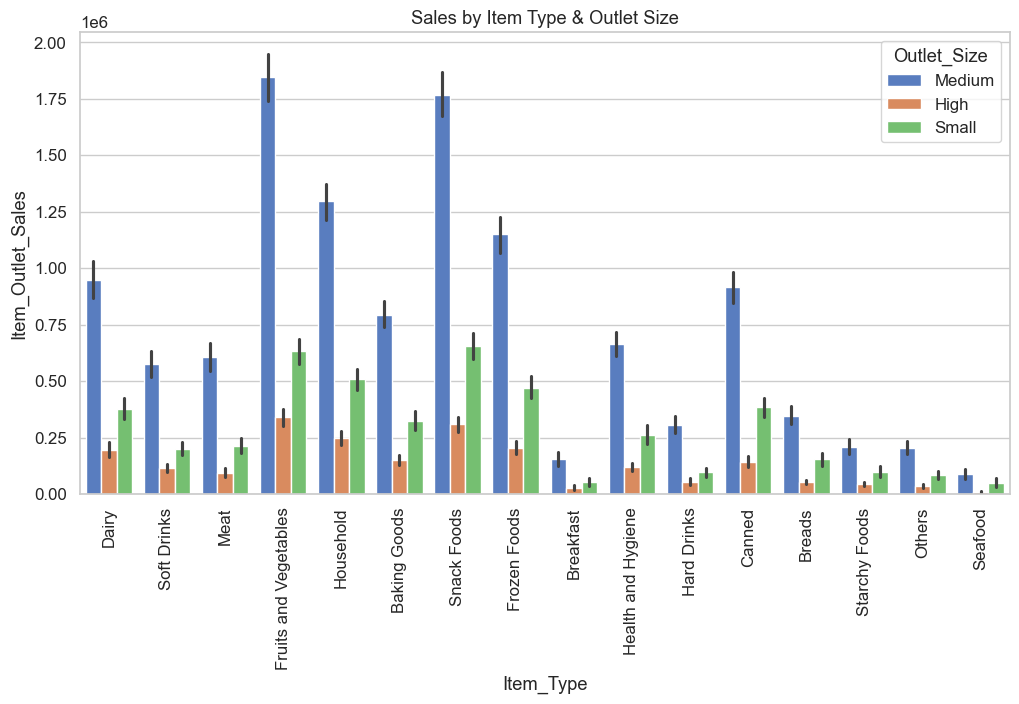

In [51]:
# . Sales by Item Type & Outlet Size (Grouped Bar)
plt.figure(figsize=(12,6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=df, estimator=sum)
plt.title("Sales by Item Type & Outlet Size")
plt.xticks(rotation=90)
plt.show()


In [52]:
#Larger outlets (High Outlet Size) consistently record higher sales across almost all item types.
#Certain categories like Fruits & Vegetables, Snack Foods, and Household Items contribute the most sales.
#Smaller outlets struggle to generate comparable sales, showing a clear scale advantage for bigger outlets.

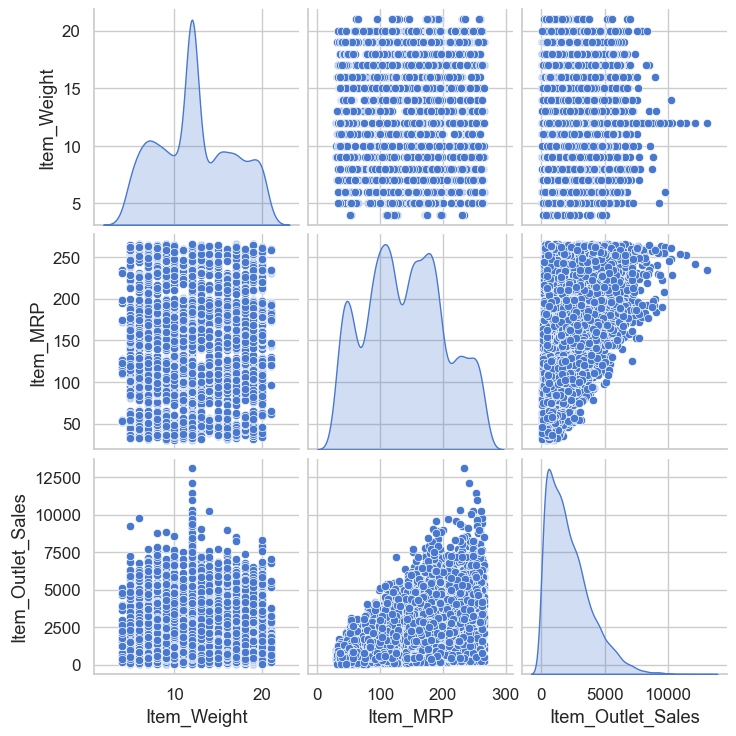

In [53]:
#  Pairplot - Numeric features
sns.pairplot(df[['Item_Weight','Item_MRP','Item_Outlet_Sales']], diag_kind='kde')
plt.show()

In [54]:
#Clear positive trend between Item_MRP and Item_Outlet_Sales.
#Item_Weight shows no visible relationship with sales.
#Data points suggest that price (MRP) is a much stronger predictor of sales than weight.

In [55]:
# Documentation, Insights & Presentation

## ✅ Summary of Analysis

### 1. Data Overview & Cleaning
#- The dataset consists of sales information for various items across multiple outlet types.  
#- Missing values were detected in `Item_Weight` and `Outlet_Size` and handled appropriately.  
#- Unrealistic values like `Item_Visibility = 0` were treated as data quality issues and corrected.
 
###Key Insights

#1;Item MRP vs Sales
#There is a strong positive relationship between Item_MRP and Item_Outlet_Sales. Higher MRP items generally contribute to higher sales.

#2;Outlet Type Impact
#Supermarket Type 3 consistently generates the highest sales, while Grocery Stores have the lowest, 
#suggesting outlet infrastructure strongly affects sales.

#3;Outlet Size Effect
#Larger outlets (High/Medium size) achieve significantly higher sales compared to small outlets, highlighting the importance of outlet capacity.

#3;Item Visibility Issue
#Some products have Item_Visibility = 0, which is unrealistic. This indicates data quality issues. 
#After imputation, we see that very low or very high visibility items may not always generate high sales.

#4;Outlet Age & Sales
#Newer outlets (established most recently) tend to show higher average sales than older ones, 
#possibly due to modern facilities or larger scale operations.

#5;Fat Content
#Sales do not differ much between Low Fat and Regular items, suggesting fat content is not a major driver of sales.

## 🎯 Final Conclusion
#Sales in Big Mart are primarily influenced by *Item MRP, Outlet Type, and Outlet Size*, 
#while product characteristics like Fat Content and Weight play a minimal role. 
#Improving outlet infrastructure and focusing on higher-priced product categories could significantly boost overall sales performance.